<a href="https://colab.research.google.com/github/lmay1231/cosc470s24/blob/main/Solutions/FastNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [1]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [2]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [4]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0]) # replace this with the correct function call!
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  # add code here that determines which average was closest to darkness
  return 0

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)


Epoch 0 : 8993 / 10000
Epoch 1 : 9191 / 10000
Epoch 2 : 9291 / 10000
Epoch 3 : 9282 / 10000
Epoch 4 : 9363 / 10000
Epoch 5 : 9353 / 10000
Epoch 6 : 9421 / 10000
Epoch 7 : 9378 / 10000
Epoch 8 : 9440 / 10000
Epoch 9 : 9446 / 10000
Epoch 10 : 9412 / 10000
Epoch 11 : 9427 / 10000
Epoch 12 : 9471 / 10000
Epoch 13 : 9437 / 10000
Epoch 14 : 9474 / 10000
Epoch 15 : 9471 / 10000
Epoch 16 : 9490 / 10000
Epoch 17 : 9450 / 10000
Epoch 18 : 9486 / 10000
Epoch 19 : 9490 / 10000
Epoch 20 : 9487 / 10000
Epoch 21 : 9511 / 10000
Epoch 22 : 9486 / 10000
Epoch 23 : 9479 / 10000
Epoch 24 : 9509 / 10000
Epoch 25 : 9503 / 10000
Epoch 26 : 9508 / 10000
Epoch 27 : 9499 / 10000
Epoch 28 : 9503 / 10000
Epoch 29 : 9528 / 10000


In [7]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly

correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[1.53392953e-12]
 [9.98203400e-01]
 [5.30604421e-05]
 [2.54891038e-06]
 [9.99182121e-11]
 [2.06954061e-06]
 [8.37700454e-06]
 [1.00406019e-05]
 [4.28528234e-05]
 [2.00292968e-10]]
1
1
[954, 1121, 973, 942, 937, 846, 932, 965, 918, 940]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.9734693877551021, 0.9876651982378855, 0.9428294573643411, 0.9326732673267327, 0.9541751527494908, 0.9484304932735426, 0.9728601252609603, 0.938715953307393, 0.9425051334702259, 0.931615460852329]


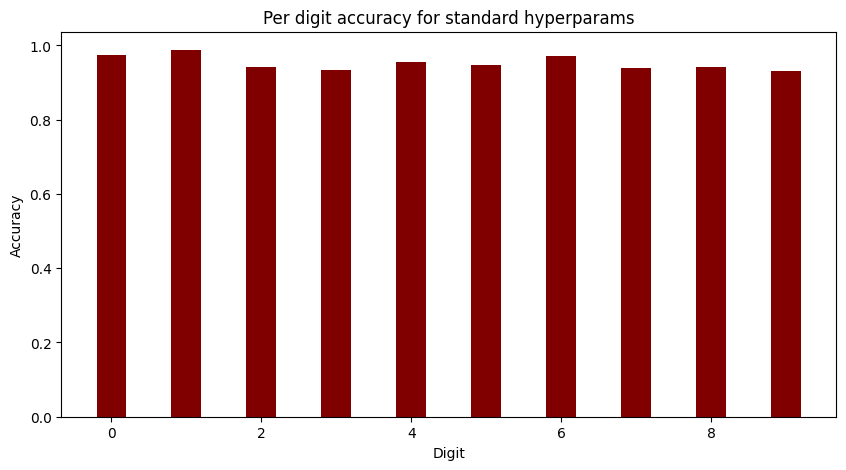

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [9]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[ 2.04720332 -0.74733433  1.44020346 ...  0.23411007 -1.65983614
  -0.88857086]
 [-1.12654914  0.88206051 -0.52798654 ... -0.4849727  -1.9882342
   0.34815471]
 [ 0.12819558  0.3661199  -1.48137276 ...  0.35968295  2.12155668
   0.15842026]
 ...
 [ 0.60930156  0.74600244  1.02623255 ... -0.39449228 -0.80848321
   0.00446635]
 [-0.41649521 -0.99638836 -1.03491189 ...  0.79670045  1.53718408
   1.49111678]
 [ 0.73998025  0.59041888  0.40958488 ...  1.76074484 -0.09823831
   1.66052181]]


In [10]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[-3.39317753e+00  2.11272575e+00  3.54018456e-01  5.53389122e+00
  -2.83147417e+00 -4.32139503e+00 -8.31560768e-01 -4.85719941e-01
  -4.58822730e+00  2.68127483e+00 -3.11941752e+00 -6.60591682e+00
  -4.07104974e+00  3.04646621e+00  2.25779218e+00 -1.63452005e-01
  -4.56119273e+00 -5.34037634e+00 -1.14770773e-01 -3.35336274e+00
  -4.41619057e+00  1.48813799e+00 -3.86269054e+00  3.28300716e+00
  -2.00275069e+00 -8.03415502e-01 -4.38390886e+00 -2.75706320e+00
   4.61885541e-01  3.70271011e+00]
 [ 4.04728779e+00  2.80925104e+00 -2.82928437e+00 -3.35777342e+00
  -1.09047175e+00 -4.61131209e+00  1.33498663e+00 -1.25264645e+00
  -7.87336418e-01  6.38399368e-01 -1.78995593e+00  3.29146997e-01
   1.21030235e+00 -3.46959170e+00 -3.38030944e+00 -1.77369324e+00
   3.72185370e+00 -4.61896605e+00 -2.74513495e+00  5.94785810e+00
  -1.19829693e+00  9.03550364e-01  2.58762581e+00 -1.45666234e+00
   6.86644768e-01 -4.09508732e+00  2.07883660e+00  3.11922390e+00
  -5.83774941e-02 -2.87850751e+0

In [13]:
# part 3 - experiment with different hyper parameters
#  epochs - 5, 15, 30, 60 (batch size 10, learning 3.0)
#  batch - 5, 10, 50, 100 (epochs 30, learning 3.0)
#  learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10)


In [12]:
net = network.Network([784, 30, 10])
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)

Epoch 0 : 9069 / 10000
Epoch 1 : 9282 / 10000
Epoch 2 : 9355 / 10000
Epoch 3 : 9412 / 10000
Epoch 4 : 9434 / 10000
